# **DeepTweets Challenge**


<pre>
<font color='blue'>
                                                                                Full name: NACHOUR Ilham
                                                                                User name:ORCL-DS-APP4038
                                                                                Team name:PGX-DS-T4038
        
</font>
</pre>

## Importing the Libraries

In [1]:
#import required libraries 
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords

import re
import string

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer

from sklearn import metrics

## Loading test and train data

In [2]:
#read train data
train = pd.read_csv('train.csv')
#read test data
test = pd.read_csv('test.csv')

## First look to our data

In [3]:
print('----------------------------------------------------train data ---------------------------------------------------------')
display(train.head())
print('----------------------------------------------------test data ----------------------------------------------------------')
display(test.head())

----------------------------------------------------train data ---------------------------------------------------------


,TweetId,Label,TweetText
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...
1,304834304222064640,Politics,'@rraina1481 I fear so'
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...


----------------------------------------------------test data ----------------------------------------------------------


,TweetId,TweetText
0,306486520121012224,'28. The home side threaten again through Maso...
1,286353402605228032,'@mrbrown @aulia Thx for asking. See http://t....
2,289531046037438464,'@Sochi2014 construction along the shores of t...
3,306451661403062273,'#SecKerry\u2019s remarks after meeting with F...
4,297941800658812928,'The #IPLauction has begun. Ricky Ponting is t...


## Data Exploration

In [4]:
#check out the shape of the data
print('shape train    : {}'.format(train.shape))
print('shape test     : {}'.format(test.shape))

shape train    : (6525, 3)
shape test     : (2610, 2)


The train set has 6525 rows and 3 features,while test-set has 2610 rows and only 2 features,this is due to,the fact that the test data doesn't include the target column Label.

In [5]:
#check if there are duplicated values in train and test data
print('Number of duplicate rows in train data:',train.duplicated().sum())
print('Number of duplicate rows in test data :',test.duplicated().sum())

Number of duplicate rows in train data: 0
Number of duplicate rows in test data : 0


It seems like duplicate rows don't exist in our data.

let's check if there are some missing values in our data

In [6]:
print('The sum of missing values in train data :',sum(train.isnull().sum()))
print('The sum of missing values in test data :',sum(test.isnull().sum()))

The sum of missing values in train data : 0
The sum of missing values in test data : 0


In [7]:
display(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6525 entries, 0 to 6524
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TweetId    6525 non-null   int64 
 1   Label      6525 non-null   object
 2   TweetText  6525 non-null   object
dtypes: int64(1), object(2)
memory usage: 153.1+ KB


None

In [8]:
display(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2610 entries, 0 to 2609
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TweetId    2610 non-null   int64 
 1   TweetText  2610 non-null   object
dtypes: int64(1), object(1)
memory usage: 40.9+ KB


None

In [9]:
#unique values of train and training data
print(train['Label'].unique())

['Politics' 'Sports']


In [10]:
#Statistics
train.describe()

,TweetId
count,6.525000e+03
mean,2.887131e+17
std,5.139819e+16
min,2.390931e+10
25%,2.941380e+17
50%,3.025319e+17
75%,3.053242e+17
max,3.068341e+17


In [11]:
#Statistics
test.describe()

,TweetId
count,2.610000e+03
mean,2.803202e+17
std,6.844036e+16
min,2.320824e+09
25%,2.941447e+17
50%,3.017323e+17
75%,3.056284e+17
max,3.068337e+17


## Data visualisation

In [12]:
sns.set(rc={'figure.figsize':(12,6)})

<AxesSubplot: >

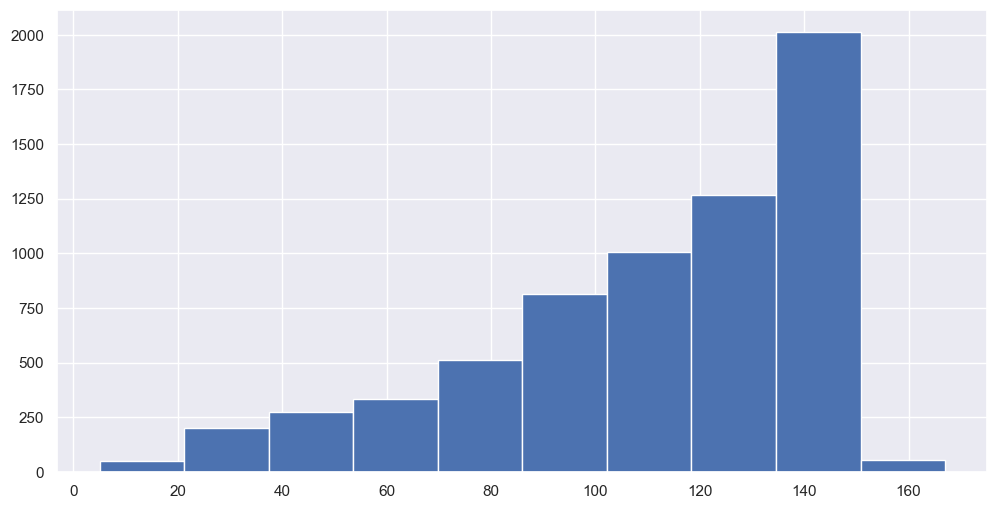

In [13]:
#lenght of tweets per count
train['TweetText'].str.len().hist()

<AxesSubplot: xlabel='Label', ylabel='count'>

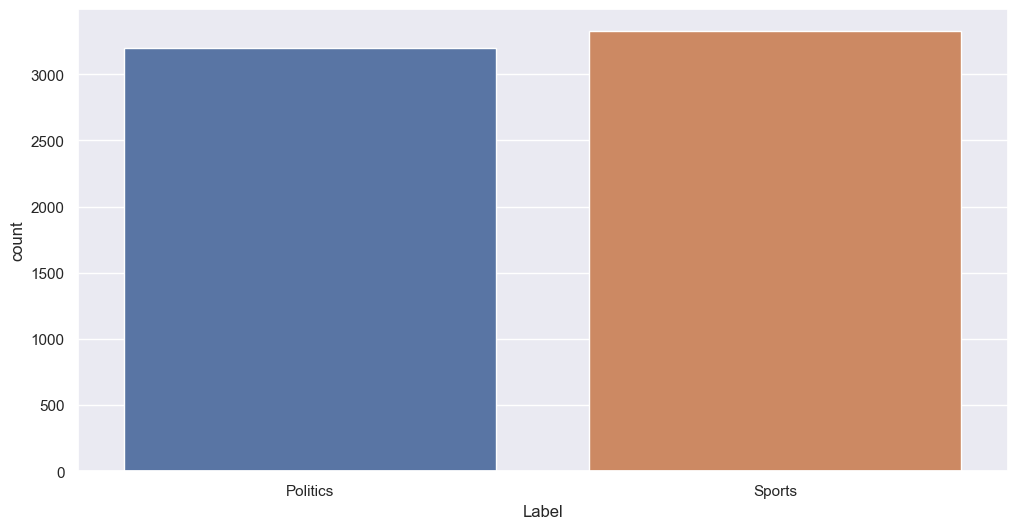

In [14]:
#labels
sns.countplot(x='Label', data=train)

## Feature Extraction

In [15]:
# clean tweets function
def clean_Tweets(tweet):
    tweet = re.sub(r'@[A-Za-z0-9]+', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    tweet = re.sub(r'RT[\s]+', '', tweet)
    tweet = re.sub(r'https?:\/\/\S+', '', tweet)
    #converts all text in the tweet to lowercase
    tweet = tweet.lower()
    tweet = ''.join([i for i in tweet if i not in string.punctuation])
    return tweet

In [16]:
stop_words = nltk.corpus.stopwords.words('english')
#len(set(stop_words))

In [17]:
#remove stopwords function
def remove_stopwords(txt):
    return " ".join([word for word in str(txt).split() if word not in stop_words])

In [18]:
lm = nltk.WordNetLemmatizer()
#lematizer tweets function
def lemmatizer_tweet(tweet):
    tweet = tweet.split(' ')
    text = " ".join([lm.lemmatize(word) for word in tweet])
    return text

After defining the functions, we will create a new column called '*cleanTweets*' by applying all of these functions to the "TweetText" of each data point. This means that we will use the defined functions to clean up the text data in the "Tweet Text" column and store the cleaned up version in a new column called "cleanTweets".

In [19]:
train['cleanTweets'] = train['TweetText'].apply(clean_Tweets)
train['cleanTweets'] = train['cleanTweets'].apply(remove_stopwords)
train['cleanTweets'] = train['cleanTweets'].apply(lemmatizer_tweet)


test['cleanTweets'] = test['TweetText'].apply(clean_Tweets)
test['cleanTweets'] = test['cleanTweets'].apply(remove_stopwords)
test['cleanTweets'] = test['cleanTweets'].apply(lemmatizer_tweet)

In [20]:
train.head()

,TweetId,Label,TweetText,cleanTweets
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...,seckerry value measured dollar term deepest am...
1,304834304222064640,Politics,'@rraina1481 I fear so',fear
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...,watch video highlight wwc13 final australia we...
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...,nitro circus albertpark theymakeitlooksoeasy c...
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...,always good thing thanks feedback


In [21]:
test.head()

,TweetId,TweetText,cleanTweets
0,306486520121012224,'28. The home side threaten again through Maso...,28 home side threaten mason bennett get end lo...
1,286353402605228032,'@mrbrown @aulia Thx for asking. See http://t....,thx asking see derives series abbreviation pou...
2,289531046037438464,'@Sochi2014 construction along the shores of t...,construction along shore black sea
3,306451661403062273,'#SecKerry\u2019s remarks after meeting with F...,seckerryu2019s remark meeting foreign minister...
4,297941800658812928,'The #IPLauction has begun. Ricky Ponting is t...,iplauction begun ricky ponting first player go...


In [22]:
print(train.isnull().sum())
print(test.isnull().sum())

TweetId        0
Label          0
TweetText      0
cleanTweets    0
dtype: int64
TweetId        0
TweetText      0
cleanTweets    0
dtype: int64


In [23]:
X=train['cleanTweets']
y=train['Label']

In [24]:
#Split train data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

## Model Training

## Model Fitting

For this problem, we choose to work with LogisticRegression as the baseline model, and SVC (SVM) as a comparatif model

In [26]:
# logisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
y_pred_lr = lr_model.predict(X_test)


In [27]:
#SVC

svc_model = SVC(kernel='rbf',C=10)
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

## Model Evaluation

Let's now evaluate our models

In [28]:
print('accuracy of LogisticRegression:',metrics.accuracy_score(y_test,y_pred_lr))
print('accuracy of SVC:',metrics.accuracy_score(y_test,y_pred_svc))

accuracy of LogisticRegression: 0.9318007662835249
accuracy of SVC: 0.9264367816091954


We can observe that LogisticRegression and SVC are closed, but:
   
  -  LogisticRegression has the best value of Accuracy.
 
Based on model evaluatuin, we  consider the LogisticRegression model as the most efficient model.So,we gonna use the *LogisticRegression* model to predict the new data : test

In [29]:
new_tweets=test['cleanTweets']
new_tweets=vectorizer.transform(test['cleanTweets'])
pred=lr_model.predict(new_tweets)

In [30]:
#save submission to csv
submit_df = pd.DataFrame(test['TweetId'])
submit_df['label'] = pred
submit_df.to_csv('submission.csv', index=False)